# Activity Mapping for Salzburg Region\n
    
This notebook demonstrates how to process and visualize GPS tracks from Strava activity exports, specifically focusing on activities within the Salzburg Austria area.
    
## Overview

The analysis includes:
- Reading GPX files with robust encoding handling
- Geographic filtering to focus on the Salzburg region
- Creating map visualizations of GPS tracks
- Data exploration and statistics

**Author:** Emese Gojdár  
**Date:** 2025

### 1. Import Libraries and Functions
First, we import the necessary libraries and our custom functions from the `functions.py` module.

In [1]:
# Import standard libraries
import pandas as pd
import matplotlib.pyplot as plt
import os
from pathlib import Path

import importlib
import functions
importlib.reload(functions)
from functions import read_gpx_file, convert_x, convert_y, plot_map
print("✅ All libraries and functions imported successfully!")

✅ All libraries and functions imported successfully!


### 2. Configuration and Constants
Define the geographic boundaries for the Salzburg region and set up file paths.

In [ ]:
# Salzburg area bounding box coordinates - Feel free to change them if you have different GPX data, for your area
my_bbox = {
    "lon_min": 12.9,
    "lon_max": 13.08,
    "lat_min": 47.72,
    "lat_max": 47.82
}

MAP_CONFIG = {
    'alpha': 0.3,
    'linewidth': 0.3,
    'output_file': 'my_activities_map.png'
}

GPX_FOLDER = "../a3/gpx"

def read_all_gpx_from_folder(folder_path):
    all_dfs = []
    for filename in os.listdir(folder_path):
        if filename.lower().endswith('.gpx'):
            filepath = os.path.join(folder_path, filename)
            df = read_gpx_file(filepath)
            if not df.empty:
                all_dfs.append(df)
    if all_dfs:
        return pd.concat(all_dfs, ignore_index=True)
    else:
        return pd.DataFrame()

df_all = read_all_gpx_from_folder(GPX_FOLDER)

print(f"📍 Salzburg bounding box: {my_bbox}")
print(f"📁 GPX folder: {GPX_FOLDER}")


📍 Salzburg bounding box: {'lon_min': 12.9, 'lon_max': 13.08, 'lat_min': 47.72, 'lat_max': 47.82}
📁 GPX folder: ../a3/gpx


### 3. Load and Process GPX Data
Use our custom function to load all GPX files from the specified directory and filter them to the Salzburg region.

In [4]:
# Load and process GPX data with geographic filtering
def load_all_gpx(folder_path):
    all_dfs = []
    for file in Path(folder_path).glob("*.gpx"):
        try:
            df = read_gpx_file(str(file))
            all_dfs.append(df)
        except Exception as e:
            print(f"⚠️ Hiba a fájl betöltésekor: {file} - {e}")
    if all_dfs:
        return pd.concat(all_dfs, ignore_index=True)
    else:
        return pd.DataFrame()

df = load_all_gpx(GPX_FOLDER)
print(f"Összes GPS pont: {len(df):,}")

Összes GPS pont: 193,476


In [5]:
df_salzburg = df[
    (df['lat'] >= my_bbox['lat_min']) &
    (df['lat'] <= my_bbox['lat_max']) &
    (df['lon'] >= my_bbox['lon_min']) &
    (df['lon'] <= my_bbox['lon_max'])
]

print(f"Szűrt GPS pontok Salzburg területén: {len(df_salzburg):,}")


Szűrt GPS pontok Salzburg területén: 28,522


### 4. Data Exploration
Let's examine the structure and characteristics of our GPS data.

In [6]:
# Display basic information about the dataset
if not df_salzburg.empty:
    print("📊 Dataset Overview:")
    print(f"   • Total GPS points: {len(df_salzburg):,}")
    print(f"   • Number of activities: {df_salzburg['name'].nunique()}")
    print(f"   • Date range: {df_salzburg['time'].min()} to {df_salzburg['time'].max()}")
    print(f"   • Columns: {list(df_salzburg.columns)}")
    
    print("\n📋 Sample data:")
    display(df_salzburg.head())
    
    print("\n📈 Geographic bounds of loaded data:")
    print(f"   • Latitude: {df_salzburg['lat'].min():.6f} to {df_salzburg['lat'].max():.6f}")
    print(f"   • Longitude: {df_salzburg['lon'].min():.6f} to {df_salzburg['lon'].max():.6f}")
else:
    print("❌ No data to explore. Please check the data loading step.")

📊 Dataset Overview:
   • Total GPS points: 28,522
   • Number of activities: 14
   • Date range: 2024-10-20 10:06:52+00:00 to 2025-06-05 15:24:12+00:00
   • Columns: ['lat', 'lon', 'ele', 'time', 'name']

📋 Sample data:


,lat,lon,ele,time,name
4320,47.786961,13.062115,421.7,2025-06-05 14:47:36+00:00,14705318029.gpx
4321,47.786955,13.062094,421.6,2025-06-05 14:47:37+00:00,14705318029.gpx
4322,47.786949,13.062086,421.6,2025-06-05 14:47:38+00:00,14705318029.gpx
4323,47.786942,13.062077,421.6,2025-06-05 14:47:39+00:00,14705318029.gpx
4324,47.786935,13.062069,421.6,2025-06-05 14:47:40+00:00,14705318029.gpx



📈 Geographic bounds of loaded data:
   • Latitude: 47.761649 to 47.792644
   • Longitude: 13.035642 to 13.076992


### 7. Create Activity Map Visualization
Generate the main map visualization showing all activities in the Salzburg region using our custom plotting function.

Output()

🗺️ Creating Salzburg activities map...


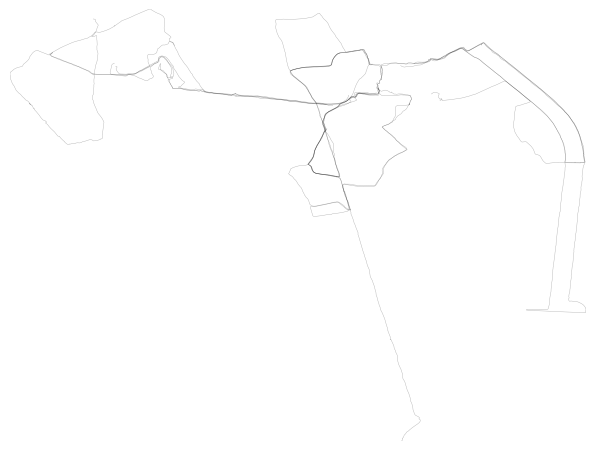

✅ Map saved as: my_activities_map.png


In [7]:
if not df_salzburg.empty:
    print("🗺️ Creating Salzburg activities map...")
    plot_map(
        df_salzburg,
        lon_min=my_bbox['lon_min'],
        lon_max=my_bbox['lon_max'],
        lat_min=my_bbox['lat_min'],
        lat_max=my_bbox['lat_max'],
        alpha=MAP_CONFIG['alpha'],
        linewidth=MAP_CONFIG['linewidth'],
        output_file=MAP_CONFIG['output_file']
    )
    print(f"✅ Map saved as: {MAP_CONFIG['output_file']}")
else:
    print("❌ No data available for mapping")